In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Coffee Shop Sales.xlsx')

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_id,149116.0,74737.371872,1.0,37335.75,74727.5,112094.25,149456.0,43153.600016
transaction_date,149116,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
transaction_qty,149116.0,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
store_id,149116.0,5.342063,3.0,3.0,5.0,8.0,8.0,2.074241
product_id,149116.0,47.918607,1.0,33.0,47.0,60.0,87.0,17.93002
unit_price,149116.0,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723


In [6]:
missing_values = df.isnull().sum()
missing_values

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [9]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [11]:
df['sales_amount']= df['transaction_qty'] * df['unit_price']

In [12]:
df['datetime'] = df['transaction_date'] + df['transaction_time']
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales_amount,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
transaction_id,149116.0,NaN,NaN,NaN,74737.371872,1.0,37335.75,74727.5,112094.25,149456.0,43153.600016
transaction_date,149116,NaN,NaN,NaN,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
transaction_time,149116,NaN,NaN,NaN,0 days 12:14:15.815794415,0 days 06:00:00,0 days 09:05:10.500000,0 days 11:15:28,0 days 15:25:57,0 days 20:59:32,0 days 03:45:57.901686173
transaction_qty,149116.0,NaN,NaN,NaN,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
store_id,149116.0,NaN,NaN,NaN,5.342063,3.0,3.0,5.0,8.0,8.0,2.074241
store_location,149116,3,Hell's Kitchen,50735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,149116.0,NaN,NaN,NaN,47.918607,1.0,33.0,47.0,60.0,87.0,17.93002
unit_price,149116.0,NaN,NaN,NaN,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723
product_category,149116,9,Coffee,58416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,149116,29,Brewed Chai tea,17183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_location = df.groupby('store_location').agg({
    'sales_amount': 'sum',
    'transaction_qty': 'sum',
    'transaction_id':'count'
})
df_location

,sales_amount,transaction_qty,transaction_id
store_location,,,
Astoria,232243.91,70991,50599
Hell's Kitchen,236511.17,71737,50735
Lower Manhattan,230057.25,71742,47782


In [20]:
daily_sales_by_location = df.groupby(['transaction_date','store_location'])['sales_amount'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


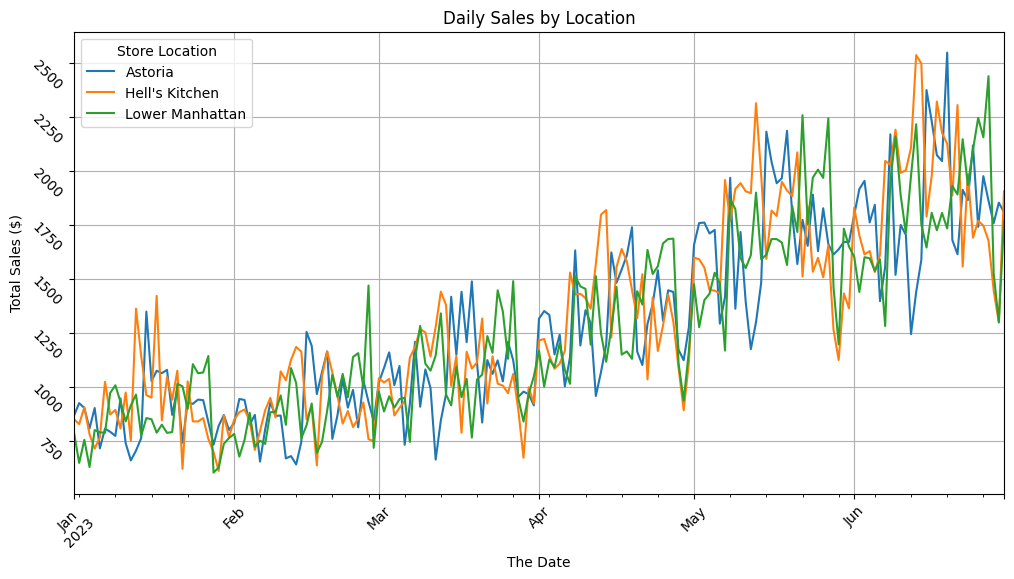

In [27]:
daily_sales_by_location.plot(figsize=(12,6),title='Daily Sales by Location')

plt.xlabel('The Date')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=-45)
plt.show()

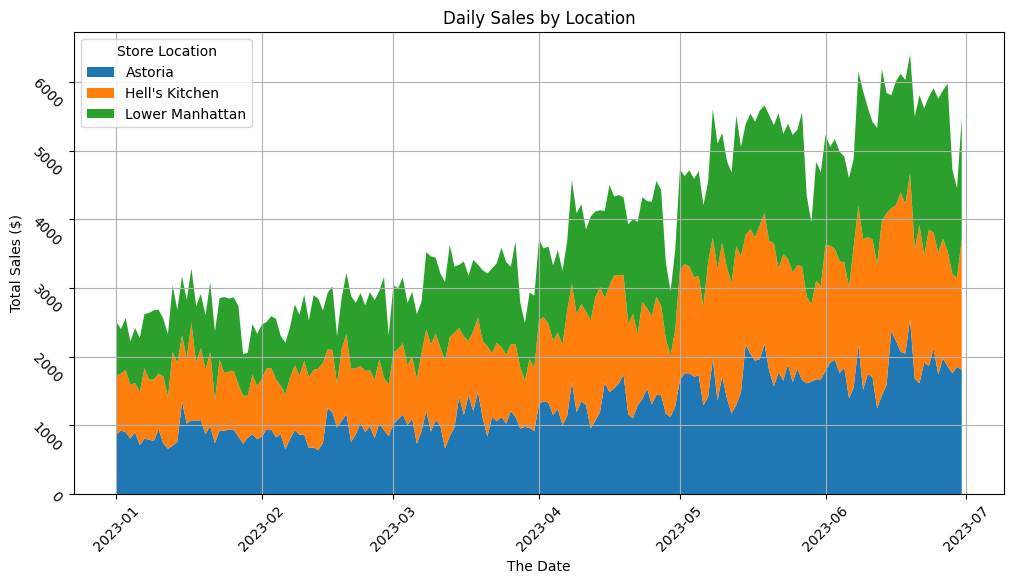

In [31]:
plt.figure(figsize=(12,6))
plt.stackplot(daily_sales_by_location.index ,daily_sales_by_location.T,labels =daily_sales_by_location.columns)
plt.title('Daily Sales by Location')
plt.xlabel('The Date')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location',loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=-45)
plt.show()


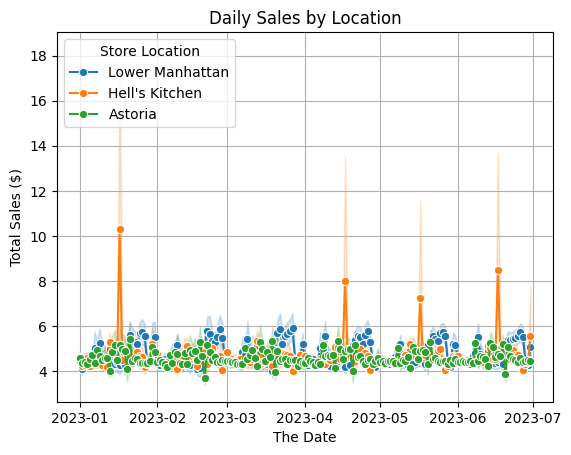

In [41]:
sns.lineplot(data=df,x='transaction_date',y='sales_amount',hue='store_location',marker='o')
plt.title('Daily Sales by Location')
plt.xlabel('The Date')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location',loc='upper left')
plt.grid(True)


<Axes: xlabel='sales_amount', ylabel='Density'>

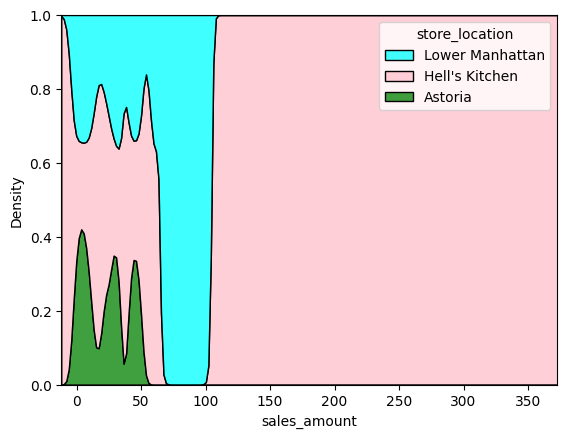

In [45]:
sns.kdeplot(data=df,x='sales_amount',hue='store_location',
             palette=['cyan','pink','green'],bw_method=1,
            fill=True,multiple='fill')

<Axes: xlabel='transaction_qty', ylabel='Density'>

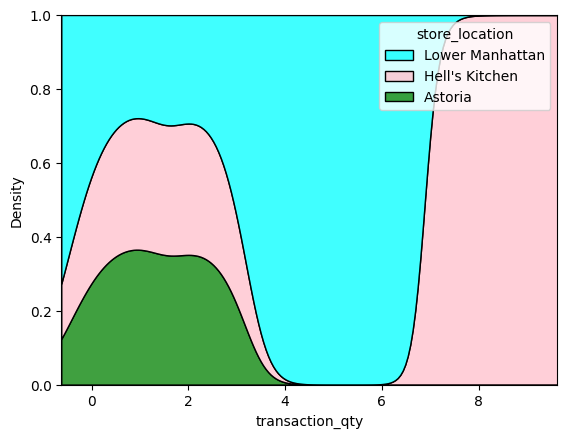

In [47]:
sns.kdeplot(data=df,x='transaction_qty',hue='store_location',
             palette=['cyan','pink','green'],bw_method=1,
            fill=True,multiple='fill')

In [49]:
daily_sales= df.groupby('transaction_date',as_index=False)['sales_amount'].sum()
df['day_of_week']= df['datetime'].dt.day_name()


In [51]:
weekly_sales = df.groupby('day_of_week')['sales_amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

In [52]:
df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales_amount'].sum().reset_index()

In [53]:
daily_sales,weekly_sales,monthly_sales

(    transaction_date  sales_amount
 0         2023-01-01       2508.20
 1         2023-01-02       2403.35
 2         2023-01-03       2565.00
 3         2023-01-04       2220.10
 4         2023-01-05       2418.85
 ..               ...           ...
 176       2023-06-26       5875.90
 177       2023-06-27       5975.65
 178       2023-06-28       4728.90
 179       2023-06-29       4450.75
 180       2023-06-30       5481.32
 
 [181 rows x 2 columns],
   day_of_week  sales_amount
 0      Monday     101677.28
 1     Tuesday      99455.94
 2   Wednesday     100313.54
 3    Thursday     100767.78
 4      Friday     101373.00
 5    Saturday      96894.48
 6      Sunday      98330.31,
      month  sales_amount
 0  2023-01      81677.74
 1  2023-02      76145.19
 2  2023-03      98834.68
 3  2023-04     118941.08
 4  2023-05     156727.76
 5  2023-06     166485.88)

In [56]:
weekly_sales = df.groupby(['day_of_week','store_location'])['sales_amount'].sum().unstack()
days_order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_sales = weekly_sales.reindex(days_order)
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


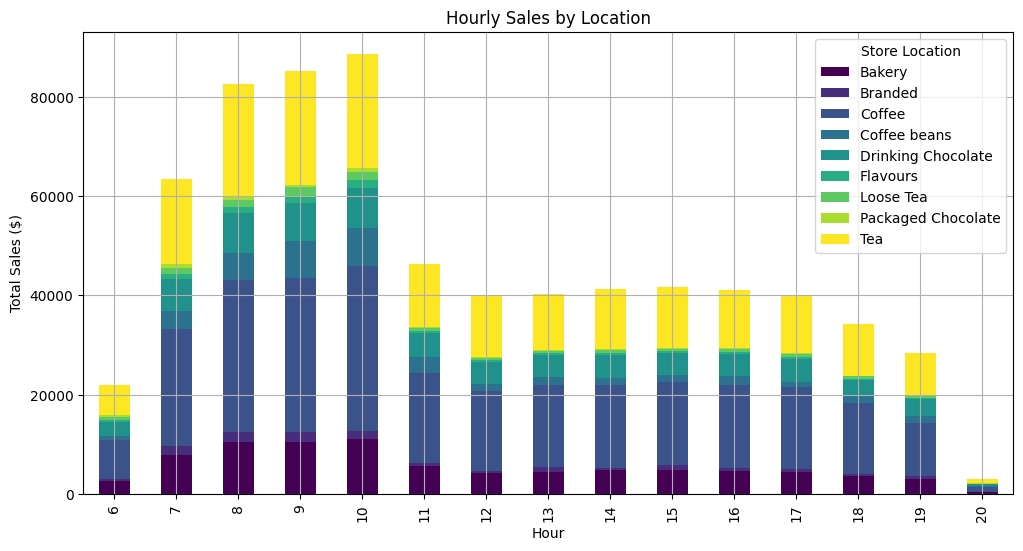

In [65]:
df['hour']=df['datetime'].dt.hour
hourly_sales = df.groupby(['hour','product_category'])['sales_amount'].sum().unstack()
hourly_sales.plot(kind='bar',figsize=(12,6),title='Hourly Sales by Location',stacked=True,colormap='viridis')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.legend(title='Store Location')
plt.grid(True)
plt.show()

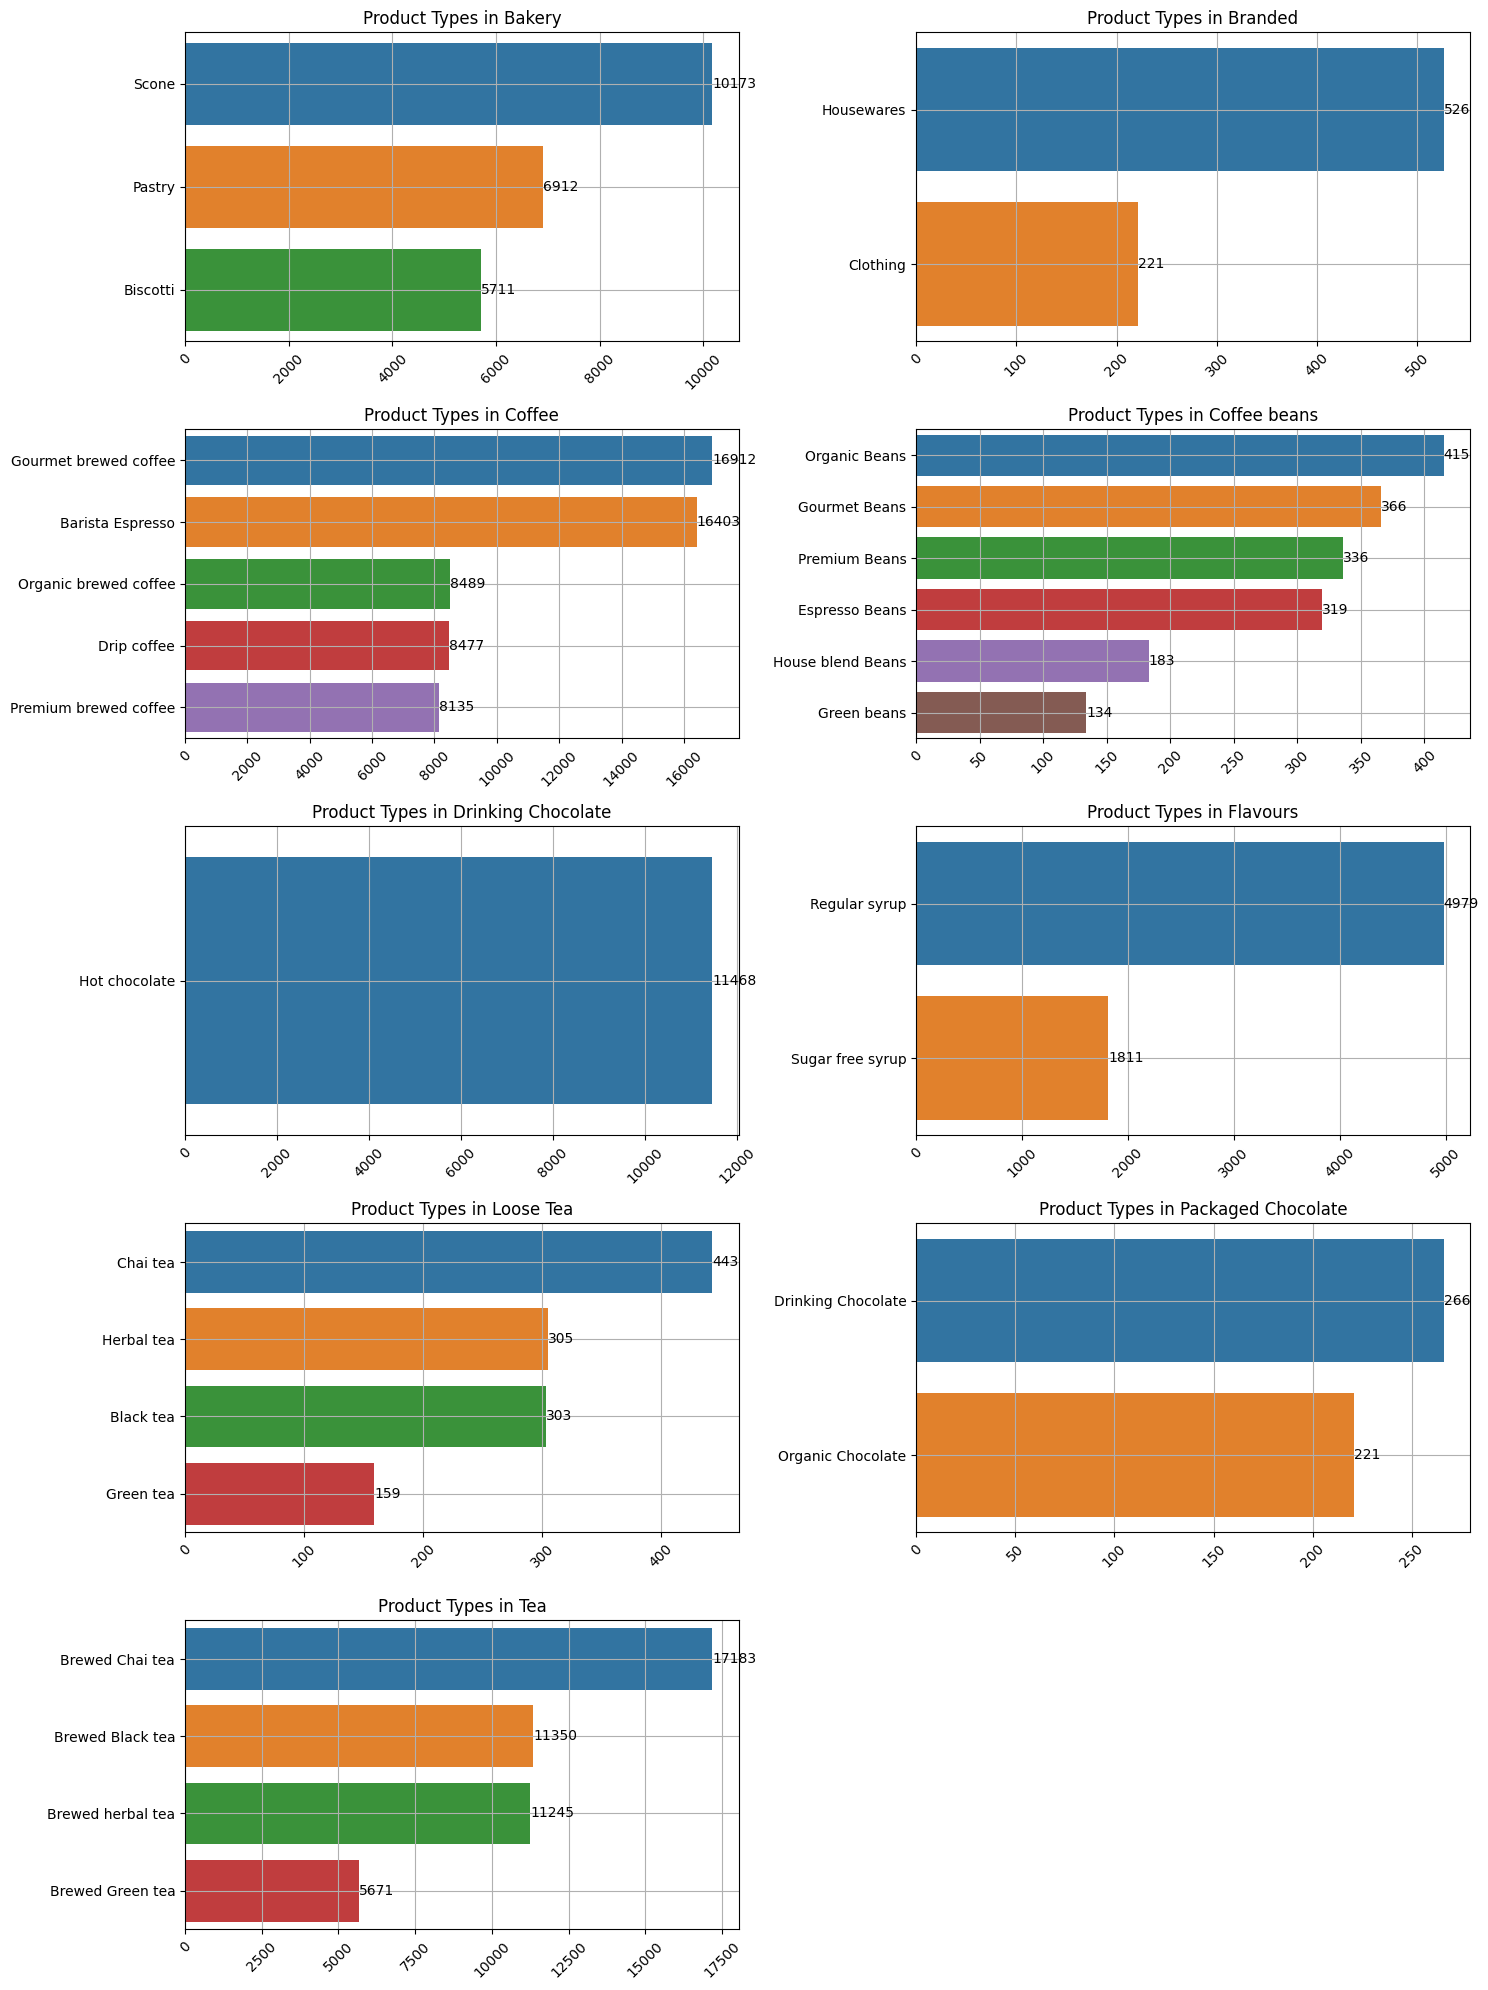

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Assuming 'counts' and 'df' are defined and imported

# Grouping and counting
counts = df.groupby(["product_category", "product_type"]).size().reset_index(name="count")

# Get unique categories
categories = counts['product_category'].unique()

# Create a colormap with enough colors for all categories
num_categories = len(categories)

# Create subplots for each category in a 5x2 grid
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]

    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending=False)

    # Create a bar plot for each category with sorted order
    sns.barplot(x='count', y='product_type', data=subset, ax=axes[i], order=subset['product_type'], palette='tab10',hue='product_type')
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha='left', va='center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(num_categories, len(axes)):
    axes[j].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
